In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [43]:
#import txt data
data = np.loadtxt('new model/2309.txt')
freqs = data[:,0]
tf_magnitude = data[:,1]
output_disp = data[:,2]
input_disp = data[:,3]

half = len(data[:,0]) // 2

In [44]:
print(output_disp[:50])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.56666199e-14
 -8.44793769e-14 -2.72273198e-13 -6.80171171e-13 -1.45190580e-12
 -2.78151429e-12 -4.92139727e-12 -8.19073464e-12 -1.29842515e-11
 -1.97813349e-11 -2.91555044e-11 -4.17842227e-11 -5.84590353e-11
 -8.00960354e-11 -1.07746641e-10 -1.42608674e-10 -1.86037744e-10
 -2.39558938e-10 -3.04878800e-10 -3.83897612e-10 -4.78721966e-10
 -5.91677612e-10 -7.25322597e-10 -8.82460676e-10 -1.06615500e-09
 -1.27974205e-09 -1.52684586e-09 -1.81139246e-09 -2.13762461e-09
 -2.51011674e-09 -2.93379020e-09 -3.41392866e-09 -3.95619384e-09
 -4.56664136e-09 -5.25173692e-09 -6.01837263e-09 -6.87388355e-09
 -7.82606455e-09 -8.88318720e-09 -1.00540170e-08 -1.13478309e-08
 -1.27744346e-08 -1.43441805e-08 -1.60679857e-08 -1.79573500e-08
 -2.00243744e-08 -2.22817794e-08]


In [45]:
print(output_disp[5]- output_disp[4])
print(output_disp[15]- output_disp[14])
print(output_disp[-1])

-1.8779382090956217e-13
-1.667481266444268e-11
1.1487806133450804


In [46]:
t = np.arange(len(output_disp))
tt_sim = np.arange(0, 1800, 1e-3) 

In [47]:
tt_sim

array([0.000000e+00, 1.000000e-03, 2.000000e-03, ..., 1.799997e+03,
       1.799998e+03, 1.799999e+03])

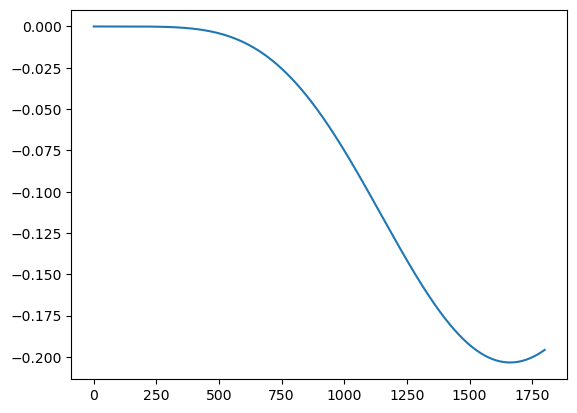

In [48]:
input_interp = interp1d(t, input_disp, kind='linear')(tt_sim)
output_interp = interp1d(t, output_disp, kind='linear')(tt_sim)
#plt.plot(tt_sim, input_interp)
plt.plot(tt_sim, output_interp)
plt.show()

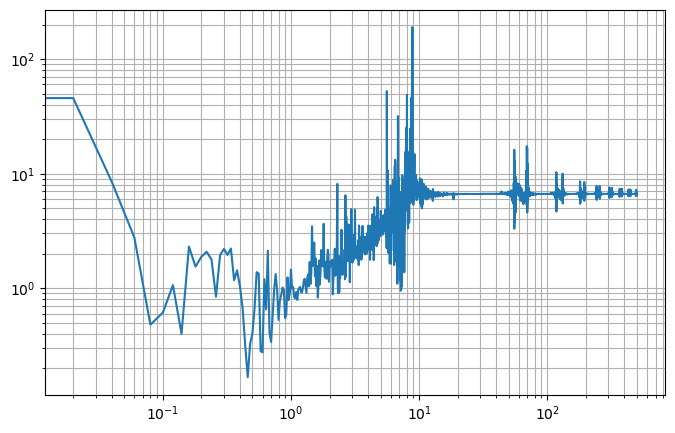

In [49]:
plt.figure(figsize=(8, 5))
plt.loglog(abs(freqs[:half]), abs(tf_magnitude[:half]))
plt.grid(True, which="both")
#plt.xlim(30, 300)
plt.show()


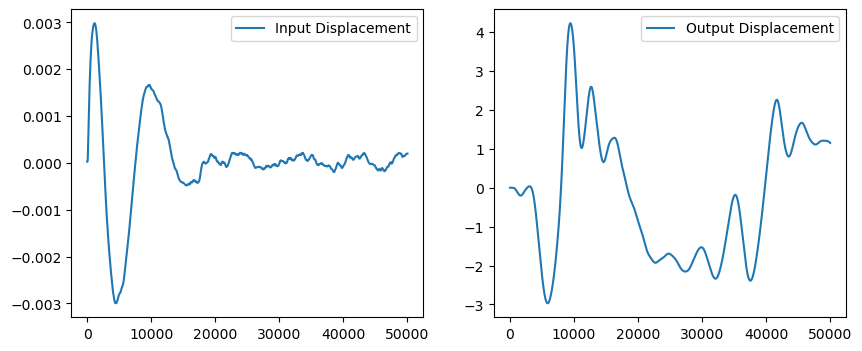

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(input_disp, label='Input Displacement')
plt.legend()

plt.subplot(1,2,2)
plt.plot(output_disp, label='Output Displacement')
plt.legend()
plt.show()

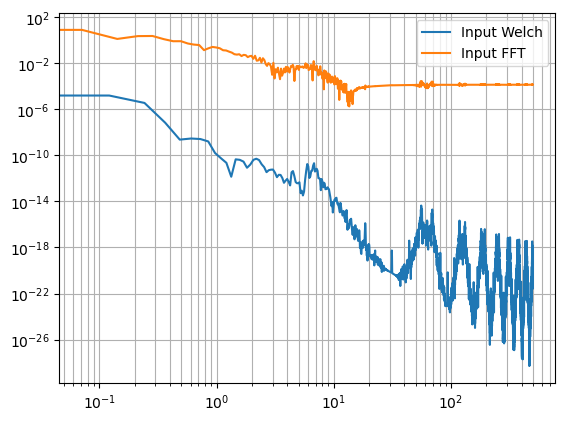

In [76]:

window = np.hanning(len(input_disp))
input_fft = np.fft.fft(input_disp )
output_fft = np.fft.fft(output_disp )
trfn = (output_fft / input_fft)

freq_w, input_welch = signal.welch(input_disp, fs=1/1e-3, window = 'hann', nperseg=8257)
freq_w_out, output_welch = signal.welch(output_disp, fs=1/1e-3, nperseg=8257)

plt.loglog(freq_w[:half], input_welch[:half], label='Input Welch')
plt.loglog(freqs[:half],abs(input_fft.real[:half]), label='Input FFT')
# plt.loglog(abs(freq_w_out), abs(output_welch), label='Output FFT')
# plt.loglog(abs(freqs), abs(trfn.real), label='Transfer Function')
plt.grid(True, which="both")
plt.legend()
plt.show()

In [63]:
print(freq_w[2]- freq_w[1])

print(freq_w_out[2]- freq_w_out[1])

0.12110936175366356
0.12110936175366356
